In [19]:
import numpy as np
import pandas
import questions 
import json
import os
import matplotlib.pyplot as plt
from scipy import stats
import statistics
# if using a Jupyter notebook, include:
%matplotlib inline

In [2]:
filepath = r"D:\Users\Amer\Desktop\bachelorarbeit\data analysis\answers"

# create two lists with the counter for right/wrong answers for each design
wrongAnswerCount = [0] * 5
rightAnswerCount = [0] * 5


# for design 1-5
for i in range(1, 6, 1):
    # iterate through all files in the directory
    for file in os.listdir(filepath):
        filename = os.fsdecode(file)

        # if text file has design i in name
        if "design " + str(i) + " " in filename:            

            # extract data from text file
            with open(''.join((filepath, r'\\', file)), 'r') as f:
                line = f.readline()
            answersJSON = json.loads(line)
            for answer in answersJSON:
                # when participant canceled
                if answersJSON[answer] == None:
                    wrongAnswerCount[i-1] +=1
                elif answersJSON[answer][0] == questions.questions[answer][2]:
                    rightAnswerCount[i-1] += 1
                else:
                    wrongAnswerCount[i-1] += 1

            
print(wrongAnswerCount)
print(rightAnswerCount)
        

[12, 17, 21, 94, 37]
[248, 243, 239, 166, 203]


In [23]:
filepath = r"D:\Users\Amer\Desktop\bachelorarbeit\data analysis\answers"

# create list of lists with all the accuracys for each design
list_of_all = [[]  for _ in range(5)] 


# for design 1-5
for i in range(1, 6, 1):
    # iterate through all files in the directory
    for file in os.listdir(filepath):
        # create two lists with the counter for right/wrong answers for each file
        wrongAnswerCount = 0
        rightAnswerCount = 0 
        filename = os.fsdecode(file)

        # if text file has design i in name
        if "design " + str(i) + " " in filename:            

            # extract data from text file
            with open(''.join((filepath, r'\\', file)), 'r') as f:
                line = f.readline()
            answersJSON = json.loads(line)
            for answer in answersJSON:
                # when participant canceled
                if answersJSON[answer] == None:
                    wrongAnswerCount +=1
                elif answersJSON[answer][0] == questions.questions[answer][2]:
                    rightAnswerCount += 1
                else:
                    wrongAnswerCount += 1
            list_of_all[i-1].append((rightAnswerCount / (rightAnswerCount + wrongAnswerCount)))
            

            
print(list_of_all)

[[0.95, 0.95, 1.0, 1.0, 1.0, 0.9, 0.9, 0.85, 0.95, 1.0, 1.0, 0.9, 1.0], [0.95, 0.95, 0.95, 0.9, 0.85, 1.0, 0.9, 0.9, 1.0, 0.95, 0.9, 0.95, 0.95], [0.9, 0.95, 1.0, 0.9, 0.95, 0.95, 0.8, 0.8, 1.0, 0.95, 0.9, 0.85, 1.0], [0.7, 0.6, 0.65, 0.7, 0.75, 0.7, 0.6, 0.3, 0.6, 0.85, 0.45, 0.6, 0.8], [0.95, 0.95, 0.85, 0.85, 0.9, 0.9, 0.8, 0.7, 0.9, 0.6, 0.9, 0.85]]


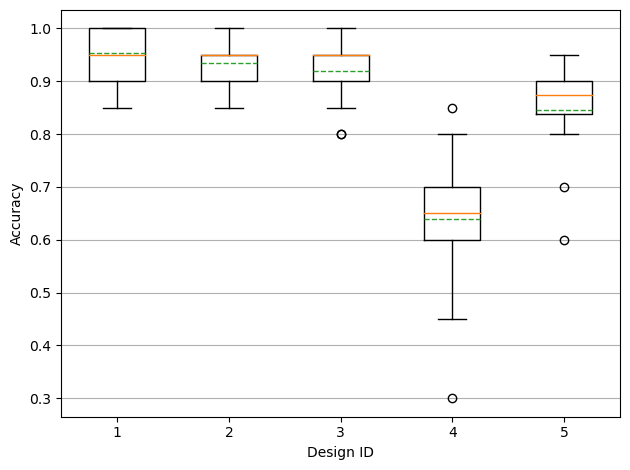

In [4]:
designs = [1, 2, 3, 4, 5]
x_pos = np.arange(len(designs))

# Build the plot
fig, ax = plt.subplots()

ax.set_ylabel('Accuracy')
ax.set_xlabel('Design ID')
# ax.set_title('Boxplots of accuracy for each design ID')
ax.yaxis.grid(True)


plt.boxplot(x = list_of_all, labels = designs, showmeans = True, meanline = True)
plt.tight_layout()
plt.savefig('boxplot_accuracy_per_design.png')
plt.show()

In [26]:
flat_list = []
for sublist in list_of_all:
    for item in sublist:
        flat_list.append(item)

stats.shapiro(flat_list)

ShapiroResult(statistic=0.8157382607460022, pvalue=2.0394215027863538e-07)

In [24]:

res = stats.wilcoxon(list_of_all[0], list_of_all[3])
print(res)

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)


In [25]:
temp = list_of_all[0]
print(temp)
del temp[7]
print(temp)

res = stats.wilcoxon(temp, list_of_all[4])
print(res)

[0.95, 0.95, 1.0, 1.0, 1.0, 0.9, 0.9, 0.85, 0.95, 1.0, 1.0, 0.9, 1.0]
[0.95, 0.95, 1.0, 1.0, 1.0, 0.9, 0.9, 0.95, 1.0, 1.0, 0.9, 1.0]
WilcoxonResult(statistic=0.0, pvalue=0.010909498364269283)


[0.9538461538461539, 0.9346153846153846, 0.9192307692307692, 0.6384615384615384, 0.8458333333333333]


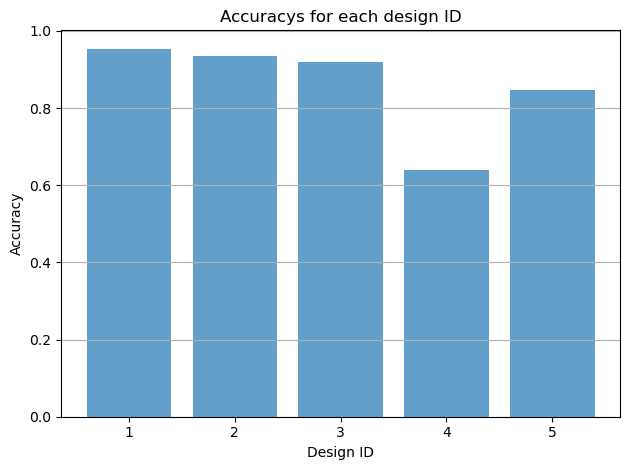

In [4]:
accuracy = [0, 0, 0, 0, 0]
for i in range(0, 5):
    accuracy[i] = (rightAnswerCount[i] / (rightAnswerCount[i] + wrongAnswerCount[i]))
print(accuracy)

designs = [1, 2, 3, 4, 5]
x_pos = np.arange(len(designs))

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, accuracy, align='center', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Design ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(designs)
ax.set_title('Accuracys for each design ID')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('accuracy_per_design.png')
plt.show()


In [58]:
filepath = r"D:\Users\Amer\Desktop\bachelorarbeit\data analysis\answers"

# create two lists with the counter for right/wrong answers for each design
wrongAnswerCount = [0] * 13
rightAnswerCount = [0] * 13


# for participants 1-13
for i in range(1, 14, 1):
    # iterate through all files in the directory
    for file in os.listdir(filepath):
        filename = os.fsdecode(file)

        # if text file has design i in name
        if filename.endswith("participant" + str(i) + ".txt"):            

            # extract data from text file
            with open(''.join((filepath, r'\\', file)), 'r') as f:
                line = f.readline()
            answersJSON = json.loads(line)
            for answer in answersJSON:
                # when participant canceled
                if answersJSON[answer] == None:
                    wrongAnswerCount[i-1] +=1
                elif answersJSON[answer][0] == questions.questions[answer][2]:
                    rightAnswerCount[i-1] += 1
                else:
                    wrongAnswerCount[i-1] += 1

            
print(wrongAnswerCount)
print(rightAnswerCount)
        

[11, 11, 20, 29, 11, 13, 17, 14, 8, 12, 11, 13, 11]
[89, 89, 80, 71, 89, 87, 83, 66, 92, 88, 89, 87, 89]


[0.89, 0.89, 0.8, 0.71, 0.89, 0.87, 0.83, 0.825, 0.92, 0.88, 0.89, 0.87, 0.89]


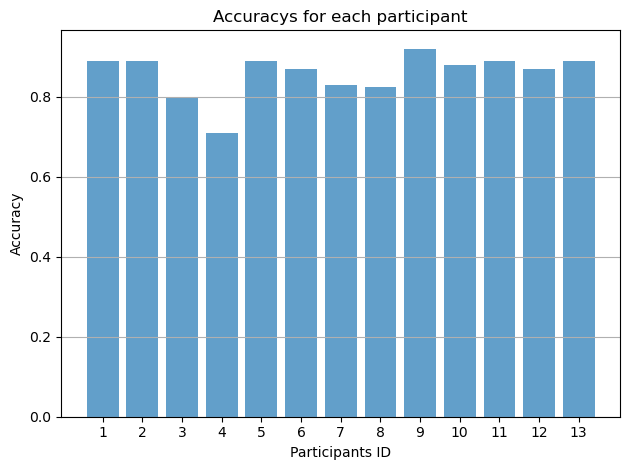

In [59]:
accuracy = [0] * 13
for i in range(0, 13):
    accuracy[i] = (rightAnswerCount[i] / (rightAnswerCount[i] + wrongAnswerCount[i]))
print(accuracy)

participants = []
participants.extend(range(1, 14))
x_pos = np.arange(len(participants))

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, accuracy, align='center', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Participants ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(participants)
ax.set_title('Accuracys for each participant')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('accuracy_per_participant.png')
plt.show()


In [16]:
# calculating range
def find_range(list_of_numbers):
    n_min = min(list_of_numbers)
    n_max = max(list_of_numbers)
    n_range = n_max - n_min
    return n_min, n_max, n_range

for e in list_of_all:
    print(find_range(e))

(0.85, 1.0, 0.15000000000000002)
(0.85, 1.0, 0.15000000000000002)
(0.8, 1.0, 0.19999999999999996)
(0.3, 0.85, 0.55)
(0.6, 0.95, 0.35)


In [17]:
def find_mean(list_of_numbers):
     sum_n = sum(list_of_numbers)
     len_n = len(list_of_numbers)
     mean = sum_n/len_n
     return mean


for e in list_of_all:
    print(find_mean(e))

0.9538461538461539
0.9346153846153845
0.9192307692307692
0.6384615384615384
0.8458333333333333


In [20]:
for e in list_of_all:
    print(statistics.variance(e))

0.002692307692307692
0.001826923076923076
0.0048076923076923045
0.0208974358974359
0.010662878787878789
